# 2019/03/13

underflowで計算できない桁があることがわかり、methyl_diffに置き換える。

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
sym.init_printing()

from sympy.stats import Beta, density
from sympy import Symbol, simplify, pprint, lambdify, latex
from sympy.plotting import plot

from scipy.special import beta, gamma
from scipy import integrate

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# validation value
v_a1 = 4
v_b1 = 3
v_a2 = 2
v_b2 = 10

n = 10000000

In [3]:
a1 = Symbol("a1", positive=True)
b1 = Symbol("b1", positive=True)

a2 = Symbol("a2", positive=True)
b2 = Symbol("b2", positive=True)

z = Symbol("z")

X1 = Beta("x1", a1, b1)
X2 = Beta("x2", a2, b2)

D1 = density(X1)(z)
D2 = density(X2)(z)

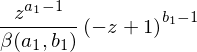

In [4]:
D1

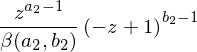

In [5]:
D2

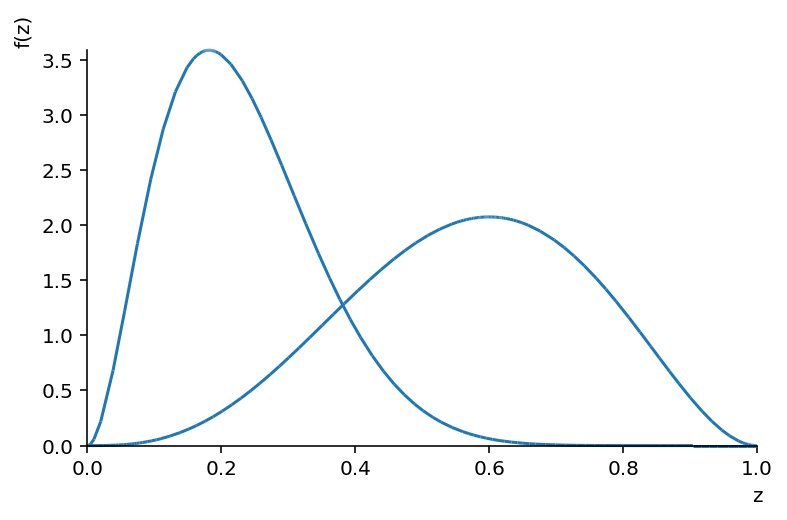

In [6]:
plot(D1.subs({a1:v_a1, b1:v_b1}), D2.subs({a2:v_b1, b2:v_b2}), (z, 0, 1))

(array([1.23314853e-05, 0.00000000e+00, 6.16574267e-06, 3.08287134e-05,
        2.46629707e-05, 4.93259414e-05, 6.16574267e-05, 1.04817625e-04,
        1.17149111e-04, 2.77458420e-04, 2.89789906e-04, 3.63778818e-04,
        6.35071495e-04, 8.13878033e-04, 1.23931428e-03, 1.60309310e-03,
        2.36764519e-03, 2.87940183e-03, 3.88441789e-03, 5.24704702e-03,
        7.05360962e-03, 9.10063619e-03, 1.13388008e-02, 1.51122353e-02,
        1.87931837e-02, 2.36271259e-02, 3.00333326e-02, 3.69327986e-02,
        4.59224514e-02, 5.62870649e-02, 6.83595890e-02, 8.44275144e-02,
        1.01105848e-01, 1.23049727e-01, 1.45659505e-01, 1.73534828e-01,
        2.03525000e-01, 2.37892850e-01, 2.75966311e-01, 3.21691458e-01,
        3.72879454e-01, 4.27933370e-01, 4.83930645e-01, 5.46716403e-01,
        6.11789651e-01, 6.85291470e-01, 7.57301178e-01, 8.27874269e-01,
        9.12338778e-01, 9.89762009e-01, 1.06806694e+00, 1.15087286e+00,
        1.23057125e+00, 1.31163227e+00, 1.37926430e+00, 1.451138

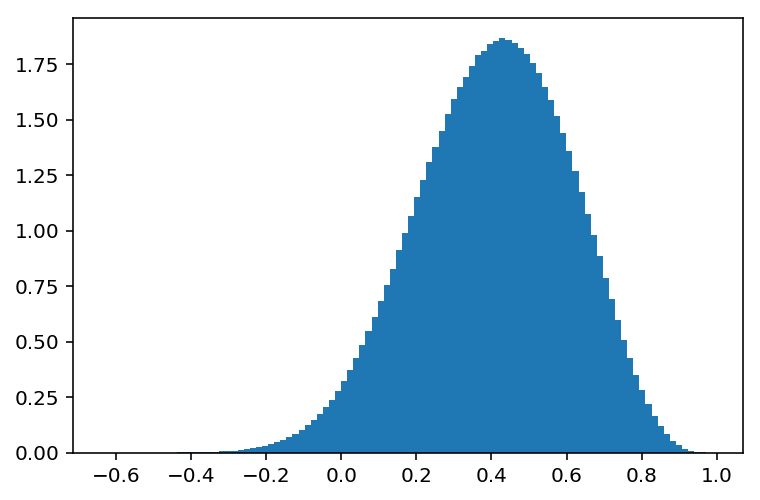

In [7]:
plt.hist(np.random.beta(v_a1,v_b1,n) - np.random.beta(v_a2,v_b2,n), bins=100, density=True)

In [8]:
((np.random.beta(v_a1,v_b1,n) - np.random.beta(v_a2,v_b2,n)) > 0).sum() / n

$$
x_1 \sim beta(a_1,b_1) \\\
x_2 \sim beta(a_2,b_2)　\\\
where, \ x_i \in (0,1)
$$

と置いたとき、

$$
x_1 - x_2
$$

が従う分布を求める。

$$
z = x_1 - x_2 \\\
w = x_1
$$

と置く時、

$$
x_1 = w \\\
x_2 = w-z
$$

を代入。ここで

$$
det(J) = 1
$$

なので

$$
f_{z,w}(z,w) = f_{x_1,x_2}(x_1, x_2) = beta(w; a_1,b_1) * beta(w-z; a_2,b_2) \\\
 = \frac{w^{a_{1} - 1} (- w + 1)^{b_{1} - 1} (w - z)^{a_{2} - 1}}{\beta{(a_{1},b_{1})} \beta{(a_{2},b_{2})}}(- w + z + 1)^{b_{2} - 1}
$$

これをtについて周辺化。

$$
    f_z(z) =
        \begin{cases}
            \int_0^{1+z} f_{z,w}(z,w) dw \quad   -1 \leqq z \leqq 0 \\
            \int_z^{1} f_{z,w}(z,w) dw \quad  0 < z \leqq 1 \\
            0 \quad elsewhere \\
        \end{cases}
$$

これを積分して、

$$
P(x_1 > x_2) = \int_0^{1} \int_z^{1} f_{z,w}(z,w) dwdz \\\
=  \int_0^{1} \int_z^{1} \frac{w^{a_{1} - 1} (- w + 1)^{b_{1} - 1} (w - z)^{a_{2} - 1}}{\beta{(a_{1},b_{1})} \beta{(a_{2},b_{2})}}(- w + z + 1)^{b_{2} - 1} dwdz
$$

https://math.stackexchange.com/questions/1825768/pdf-of-the-difference-between-two-independent-beta-random-variables

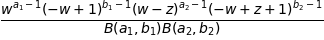

In [99]:
a1 = Symbol("a1", positive=True)
b1 = Symbol("b1", positive=True)

a2 = Symbol("a2", positive=True)
b2 = Symbol("b2", positive=True)

X1 = Beta("x1", a1, b1)
X2 = Beta("x2", a2, b2)

x1 = Symbol("x1")
x2 = Symbol("x2")

D1 = density(X1)(x1)
D2 = density(X2)(x2)

w = Symbol("w")
z = Symbol("z")

D = (D1 * D2).subs({x1 : w, x2 : w-z}) # f(s,t)
D

In [100]:
latex(D)

'\\frac{w^{a_{1} - 1} \\left(- w + 1\\right)^{b_{1} - 1} \\left(w - z\\right)^{a_{2} - 1} \\left(- w + z + 1\\right)^{b_{2} - 1}}{\\operatorname{B}\\left(a_{1}, b_{1}\\right) \\operatorname{B}\\left(a_{2}, b_{2}\\right)}'

In [ ]:
sym.integrate(D, (w, z, 1))

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4019606/
    
によると解析的に求まらないようなので、どうにか数値積分に落とし込んで見る。

lamdifyするとbetaでエラーを吐くので手打ちしてみる。

In [12]:
# f = lambda x, a1, a2, b1, b2 : ((x ** (a1 - 1)) * ((-x + 1) ** (b1 - 1)) / beta(a1, b1)) - ((x ** (a2 - 1)) * ((-x + 1) ** (b2 - 1)) / beta(a2, b2))
# print(integrate.quad(f, -1, 0, args=(2,1,1,1,)))

In [13]:
# test ただ1になることを確認.

f_test = lambda x : (x ** (v_a1 - 1)) * ((-x + 1) ** (v_b1 - 1)) / beta(v_a1, v_b1)
integrate.quad(f_test, 0, 1)

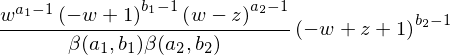

In [14]:
D

In [15]:
f = lambda w,z : ((w**(v_a1-1))*((-w+1)**(v_b1-1))*((w-z)**(v_a2-1))*((-w+z+1)**(v_b2-1))) / (beta(v_a1,v_b1)*beta(v_a2,v_b2))

In [16]:
integrate.dblquad(f, 0, 1, lambda z: z, lambda z: 1)

In [18]:
# サンプリング値
n = 100000000

((np.random.beta(v_a1,v_b1,n) - np.random.beta(v_a2,v_b2,n)) > 0).sum() / n

# for pandas

In [1]:
import pandas as pd
import numpy as np
from scipy.special import beta
from scipy import integrate
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [34]:
df = pd.DataFrame([[4,2,4,2],[4,20,4,25], [40,20,4,25], [4,25,40,20], [107, 12593, 15, 10896], [15, 10896, 107, 12593]])
df.columns = ['DP_N_Me', 'DP_N_De', 'DP_P_Me', 'DP_P_De']

In [35]:
df

,DP_N_Me,DP_N_De,DP_P_Me,DP_P_De
0,4,2,4,2
1,4,20,4,25
2,40,20,4,25
3,4,25,40,20
4,107,12593,15,10896
5,15,10896,107,12593


In [36]:
# 事前分布の情報。beta(1,1)
pri_a = 1
pri_b = 1

# for bonferroni corr
a_th = 0.05

col1_me = 'DP_N_Me'
col1_de = 'DP_N_De'
col2_me = 'DP_P_Me'
col2_de = 'DP_P_De'

In [39]:
def func_p_diff_beta(row):
    v_a1 = row[col1_me] + pri_a
    v_b1 = row[col1_de] + pri_b
    v_a2 = row[col2_me] + pri_a
    v_b2 = row[col2_de] + pri_b
    f = lambda w,z : ((w**(v_a1-1))*((-w+1)**(v_b1-1))*((w-z)**(v_a2-1))*((-w+z+1)**(v_b2-1))) / (beta(v_a1,v_b1)*beta(v_a2,v_b2))
    return integrate.dblquad(f, 0, 1, lambda z: z, lambda z: 1, epsabs=1.49e-8, epsrel=1.49e-8)[0]
#     return integrate.dblquad(f, 0, 1, lambda z: z, lambda z: 1, epsabs=1.49e-32, epsrel=1.49e-32)[0]

In [40]:
df['P_NP'] = df.apply(func_p_diff_beta, axis=1)
df['P_PN'] = 1 - df['P_NP']
df

,DP_N_Me,DP_N_De,DP_P_Me,DP_P_De,P_NP,P_PN
0,4,2,4,2,5.000000e-01,5.000000e-01
1,4,20,4,25,6.196138e-01,3.803862e-01
2,40,20,4,25,9.999991e-01,8.936806e-07
3,4,25,40,20,8.936806e-07,9.999991e-01
4,107,12593,15,10896,0.000000e+00,1.000000e+00
5,15,10896,107,12593,0.000000e+00,1.000000e+00


In [16]:
# 有意なもの
df[df['P_NP'] < a_th/df.shape[0]]

,DP_N_Me,DP_N_De,DP_P_Me,DP_P_De,P_NP,P_PN
3,107,12593,15,10896,0.0,1.0


In [8]:
df[df['P_PN'] < a_th/df.shape[0]]

,DP_N_Me,DP_N_De,DP_P_Me,DP_P_De,P_NP,P_PN
2,40,20,4,25,0.999999,8.936806e-07


# underflow problem

In [77]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt

def plot_2beta(params, xlim=None, ylim=None):
    x = np.linspace(0, 1, 1000)
    plt.xlim(0, 1)
    plt.ylim(0, 5)
    plt.xlabel(r"$\theta$",fontsize=20, fontname='serif')
    plt.ylabel(r"$P(\theta; \alpha, \beta)$",fontsize=20, fontname='serif')

    for param in params:
        rv = scipy.stats.beta(param[0],param[1])
        y = rv.pdf(x)
        plt.plot(x, y, '-', lw=2, label=param)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
        
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)

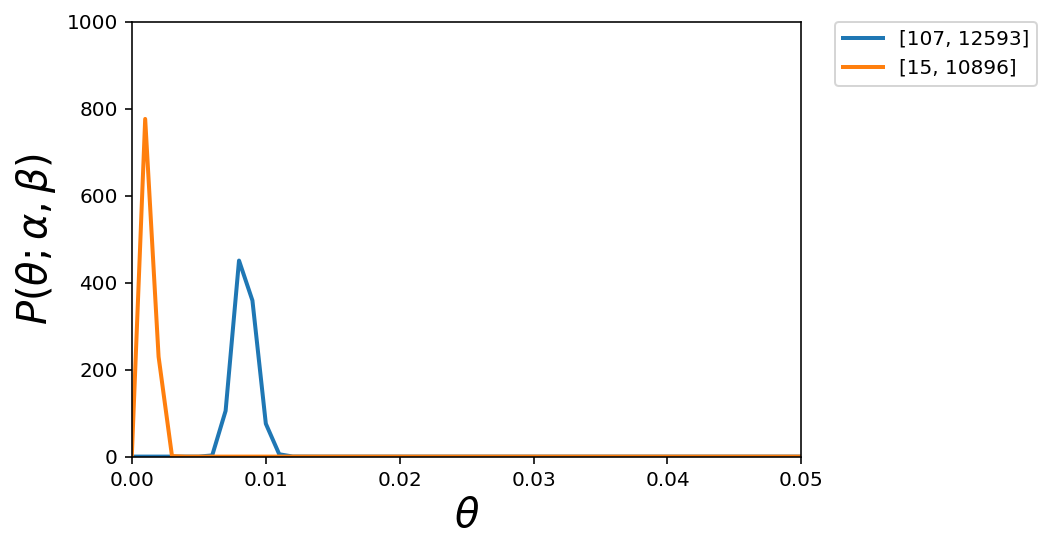

In [78]:
plot_2beta([[107, 12593], [15, 10896]], xlim=(0,0.05), ylim=(0,1000))

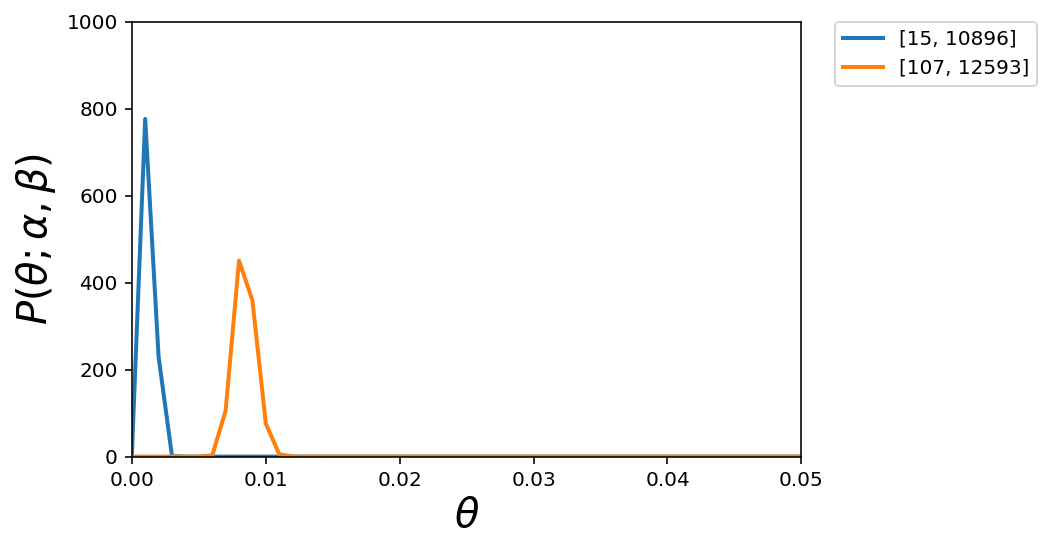

In [89]:
plot_2beta([[15, 10896],[107, 12593]], xlim=(0,0.05), ylim=(0,1000))

In [ ]:
# サンプリング値
n = 100000000
v_a1 = 107
v_b1 = 12593
v_a2 = 15
v_b1 = 10896

((np.random.beta(v_a1,v_b1,n) - np.random.beta(v_a2,v_b2,n)) > 0).sum() / n

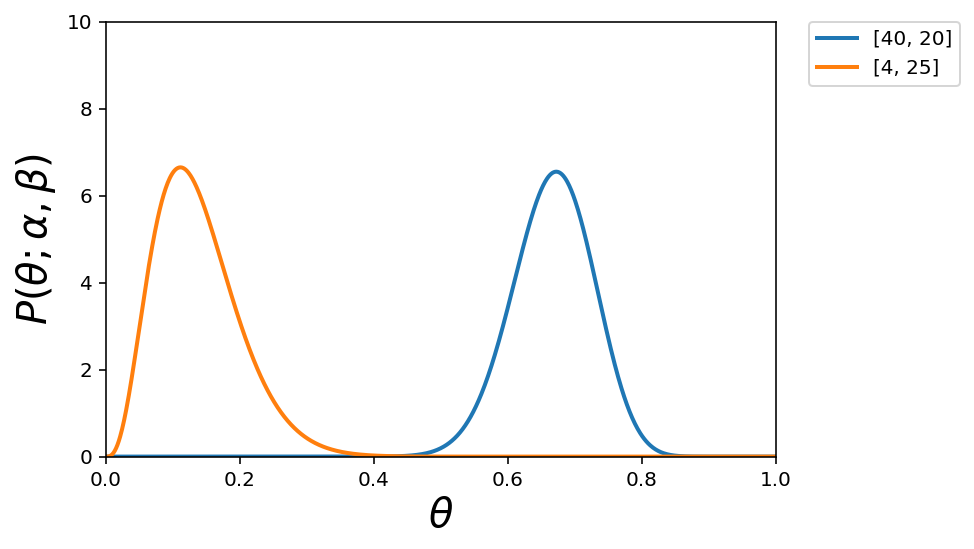

In [81]:
plot_2beta([[40,20], [4, 25]], ylim=(0,10))

In [84]:
# サンプリング値
n = 1000000000
v_a1 = 40
v_b1 = 20
v_a2 = 4
v_b1 = 25

((np.random.beta(v_a1,v_b1,n) - np.random.beta(v_a2,v_b2,n)) > 0).sum() / n

In [85]:
((np.random.beta(v_a2,v_b2,n) - np.random.beta(v_a1,v_b1,n)) > 0).sum() / n

In [95]:
epsabs = 1.49e-32
epsrel = 1.49e-32

def func_p_diff_beta(row):
    v_a1 = row[col1_me] + pri_a
    v_b1 = row[col1_de] + pri_b
    v_a2 = row[col2_me] + pri_a
    v_b2 = row[col2_de] + pri_b
    f = lambda w,z : ((w**(v_a1-1))*((-w+1)**(v_b1-1))*((w-z)**(v_a2-1))*((-w+z+1)**(v_b2-1))) / (beta(v_a1,v_b1)*beta(v_a2,v_b2))
    return integrate.dblquad(f, 0, 1, lambda z: z, lambda z: 1, epsabs=epsabs, epsrel=epsrel)[0]
#     return integrate.dblquad(f, 0, 1, lambda z: z, lambda z: 1, epsabs=1.49e-32, epsrel=1.49e-32)[0]

def func_p_diff_beta_opposite(row):
    v_a2 = row[col1_me] + pri_a
    v_b2 = row[col1_de] + pri_b
    v_a1 = row[col2_me] + pri_a
    v_b1 = row[col2_de] + pri_b
    f = lambda w,z : ((w**(v_a1-1))*((-w+1)**(v_b1-1))*((w-z)**(v_a2-1))*((-w+z+1)**(v_b2-1))) / (beta(v_a1,v_b1)*beta(v_a2,v_b2))
    return integrate.dblquad(f, 0, 1, lambda z: z, lambda z: 1, epsabs=epsabs, epsrel=epsrel)[0]
#     return integrate.dblquad(f, 0, 1, lambda z: z, lambda z: 1, epsabs=1.49e-32, epsrel=1.49e-32)[0]

def func_p_diff_beta_err(row):
    v_a1 = row[col1_me] + pri_a
    v_b1 = row[col1_de] + pri_b
    v_a2 = row[col2_me] + pri_a
    v_b2 = row[col2_de] + pri_b
    f = lambda w,z : ((w**(v_a1-1))*((-w+1)**(v_b1-1))*((w-z)**(v_a2-1))*((-w+z+1)**(v_b2-1))) / (beta(v_a1,v_b1)*beta(v_a2,v_b2))
    return integrate.dblquad(f, 0, 1, lambda z: z, lambda z: 1, epsabs=epsabs, epsrel=epsrel)[1]
#     return integrate.dblquad(f, 0, 1, lambda z: z, lambda z: 1, epsabs=1.49e-32, epsrel=1.49e-32)[0]

def func_p_diff_beta_opposite_err(row):
    v_a2 = row[col1_me] + pri_a
    v_b2 = row[col1_de] + pri_b
    v_a1 = row[col2_me] + pri_a
    v_b1 = row[col2_de] + pri_b
    f = lambda w,z : ((w**(v_a1-1))*((-w+1)**(v_b1-1))*((w-z)**(v_a2-1))*((-w+z+1)**(v_b2-1))) / (beta(v_a1,v_b1)*beta(v_a2,v_b2))
    return integrate.dblquad(f, 0, 1, lambda z: z, lambda z: 1, epsabs=epsabs, epsrel=epsrel)[1]

In [97]:
df['P_NP'] = df.apply(func_p_diff_beta, axis=1)
df['P_NP_err'] = df.apply(func_p_diff_beta_err, axis=1)
df['P_PN'] = df.apply(func_p_diff_beta_opposite, axis=1)
df['P_PN_err'] = df.apply(func_p_diff_beta_opposite_err, axis=1)
df['P_sum'] = df['P_NP'] + df['P_PN']
# df['P_PN'] = 1 - df['P_NP']
df

,DP_N_Me,DP_N_De,DP_P_Me,DP_P_De,P_NP,P_PN,P_NP_err,P_PN_err,P_sum
0,4,2,4,2,5.000000e-01,5.000000e-01,1.902047e-14,1.902047e-14,1.0
1,4,20,4,25,6.196138e-01,3.803862e-01,4.592035e-14,4.430030e-14,1.0
2,40,20,4,25,9.999991e-01,8.936806e-07,5.059789e-14,4.348426e-19,1.0
3,4,25,40,20,8.936806e-07,9.999991e-01,4.348426e-19,5.059789e-14,1.0
4,107,12593,15,10896,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
5,15,10896,107,12593,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0


In [51]:
df['P_NP'] = df.apply(func_p_diff_beta, axis=1)
df['P_PN'] = 1 - df['P_NP']
df['P_NP_err'] = df.apply(func_p_diff_beta_err, axis=1)
df

,DP_N_Me,DP_N_De,DP_P_Me,DP_P_De,P_NP,P_PN,P_NP_err
0,4,2,4,2,5.000000e-01,5.000000e-01,1.902047e-14
1,4,20,4,25,6.196138e-01,3.803862e-01,1.309023e-08
2,40,20,4,25,9.999991e-01,8.936806e-07,2.614778e-08
3,4,25,40,20,8.936806e-07,9.999991e-01,1.112704e-08
4,107,12593,15,10896,0.000000e+00,1.000000e+00,0.000000e+00
5,15,10896,107,12593,0.000000e+00,1.000000e+00,0.000000e+00


In [87]:
def func_p_diff_beta(row):
    v_a1 = row[col1_me] + pri_a
    v_b1 = row[col1_de] + pri_b
    v_a2 = row[col2_me] + pri_a
    v_b2 = row[col2_de] + pri_b
    f = lambda w,z : ((w**(v_a1-1))*((-w+1)**(v_b1-1))*((w-z)**(v_a2-1))*((-w+z+1)**(v_b2-1))) / (beta(v_a1,v_b1)*beta(v_a2,v_b2))
#     return integrate.dblquad(f, 0, 1, lambda z: z, lambda z: 1, epsabs=1.49e-8, epsrel=1.49e-8)[0]
    return integrate.dblquad(f, 0, 1, lambda z: z, lambda z: 1, epsabs=1.49e-64, epsrel=1.49e-64)[0]

In [93]:
df['P_NP'] = df.apply(func_p_diff_beta, axis=1)
df['P_NP_err'] = df.apply(func_p_diff_beta_err, axis=1)
df['P_PN'] = df.apply(func_p_diff_beta_opposite, axis=1)
df['P_PN_err'] = df.apply(func_p_diff_beta_opposite_err, axis=1)
# df['P_PN'] = 1 - df['P_NP']
df

,DP_N_Me,DP_N_De,DP_P_Me,DP_P_De,P_NP,P_PN,P_NP_err,P_PN_err
0,4,2,4,2,5.000000e-01,5.000000e-01,1.902047e-14,1.902047e-14
1,4,20,4,25,6.196138e-01,3.803862e-01,1.309023e-08,1.040581e-08
2,40,20,4,25,9.999991e-01,8.936806e-07,2.614778e-08,1.112704e-08
3,4,25,40,20,8.936806e-07,9.999991e-01,1.112704e-08,2.614778e-08
4,107,12593,15,10896,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,15,10896,107,12593,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


/home/yyasumizu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


URLError: <urlopen error [Errno -2] Name or service not known>